<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9670453	total: 61.1ms	remaining: 1m 1s
1:	learn: 0.9349417	total: 62ms	remaining: 30.9s
2:	learn: 0.9078347	total: 62.2ms	remaining: 20.7s
3:	learn: 0.8775938	total: 66.5ms	remaining: 16.6s
4:	learn: 0.8527735	total: 66.9ms	remaining: 13.3s
5:	learn: 0.8248611	total: 69.5ms	remaining: 11.5s
6:	learn: 0.8023592	total: 69.9ms	remaining: 9.91s
7:	learn: 0.7794636	total: 70.7ms	remaining: 8.76s
8:	learn: 0.7535096	total: 71ms	remaining: 7.82s
9:	learn: 0.7300766	total: 72.1ms	remaining: 7.14s
10:	learn: 0.7073206	total: 72.4ms	remaining: 6.51s
11:	learn: 0.6845246	total: 73.2ms	remaining: 6.03s
12:	learn: 0.6630491	total: 77.2ms	remaining: 5.86s
13:	learn: 0.6429796	total: 78.4ms	remaining: 5.52s
14:	learn: 0.6228317	total: 79.3ms	remaining: 5.21s
15:	learn: 0.6046309	total: 81ms	remaining: 4.98s
16:	learn: 0.5857454	total: 82.4ms	remaining: 4.76s
17:	learn: 0.5677496	total: 83.7ms	remaining: 4.57s
18:	learn: 0.5511687	total: 83.9ms	remaining: 4.33

54:	learn: 0.2018028	total: 137ms	remaining: 2.36s
55:	learn: 0.1971590	total: 142ms	remaining: 2.39s
56:	learn: 0.1921151	total: 142ms	remaining: 2.35s
57:	learn: 0.1871737	total: 149ms	remaining: 2.42s
58:	learn: 0.1831067	total: 151ms	remaining: 2.4s
59:	learn: 0.1794483	total: 151ms	remaining: 2.37s
60:	learn: 0.1750467	total: 152ms	remaining: 2.34s
61:	learn: 0.1704399	total: 153ms	remaining: 2.32s
62:	learn: 0.1661928	total: 236ms	remaining: 3.51s
63:	learn: 0.1621517	total: 237ms	remaining: 3.47s
64:	learn: 0.1584963	total: 238ms	remaining: 3.42s
65:	learn: 0.1545463	total: 238ms	remaining: 3.37s
66:	learn: 0.1512505	total: 238ms	remaining: 3.32s
67:	learn: 0.1478010	total: 239ms	remaining: 3.27s
68:	learn: 0.1441669	total: 241ms	remaining: 3.25s
69:	learn: 0.1405300	total: 241ms	remaining: 3.21s
70:	learn: 0.1372730	total: 242ms	remaining: 3.16s
71:	learn: 0.1342470	total: 242ms	remaining: 3.12s
72:	learn: 0.1315075	total: 242ms	remaining: 3.08s
73:	learn: 0.1286089	total: 242m

107:	learn: 0.0739601	total: 292ms	remaining: 2.41s
108:	learn: 0.0727971	total: 294ms	remaining: 2.4s
109:	learn: 0.0722124	total: 296ms	remaining: 2.4s
110:	learn: 0.0715640	total: 297ms	remaining: 2.38s
111:	learn: 0.0704990	total: 297ms	remaining: 2.36s
112:	learn: 0.0696745	total: 298ms	remaining: 2.34s
113:	learn: 0.0685881	total: 299ms	remaining: 2.32s
114:	learn: 0.0675720	total: 299ms	remaining: 2.3s
115:	learn: 0.0665711	total: 301ms	remaining: 2.29s
116:	learn: 0.0658316	total: 301ms	remaining: 2.27s
117:	learn: 0.0649304	total: 301ms	remaining: 2.25s
118:	learn: 0.0641260	total: 301ms	remaining: 2.23s
119:	learn: 0.0632352	total: 302ms	remaining: 2.21s
120:	learn: 0.0624599	total: 302ms	remaining: 2.19s
121:	learn: 0.0617526	total: 303ms	remaining: 2.18s
122:	learn: 0.0611399	total: 305ms	remaining: 2.18s
123:	learn: 0.0605441	total: 309ms	remaining: 2.18s
124:	learn: 0.0600222	total: 310ms	remaining: 2.17s
125:	learn: 0.0594037	total: 311ms	remaining: 2.15s
126:	learn: 0.0

192:	learn: 0.0427496	total: 407ms	remaining: 1.7s
193:	learn: 0.0425913	total: 408ms	remaining: 1.69s
194:	learn: 0.0424554	total: 408ms	remaining: 1.68s
195:	learn: 0.0423753	total: 412ms	remaining: 1.69s
196:	learn: 0.0421961	total: 412ms	remaining: 1.68s
197:	learn: 0.0420754	total: 413ms	remaining: 1.67s
198:	learn: 0.0419690	total: 418ms	remaining: 1.68s
199:	learn: 0.0418363	total: 418ms	remaining: 1.67s
200:	learn: 0.0416908	total: 418ms	remaining: 1.66s
201:	learn: 0.0415951	total: 424ms	remaining: 1.67s
202:	learn: 0.0414611	total: 424ms	remaining: 1.66s
203:	learn: 0.0413349	total: 424ms	remaining: 1.65s
204:	learn: 0.0412343	total: 424ms	remaining: 1.65s
205:	learn: 0.0410826	total: 425ms	remaining: 1.64s
206:	learn: 0.0409304	total: 425ms	remaining: 1.63s
207:	learn: 0.0408434	total: 429ms	remaining: 1.63s
208:	learn: 0.0407077	total: 429ms	remaining: 1.62s
209:	learn: 0.0405927	total: 429ms	remaining: 1.61s
210:	learn: 0.0404723	total: 430ms	remaining: 1.61s
211:	learn: 0

288:	learn: 0.0326731	total: 521ms	remaining: 1.28s
289:	learn: 0.0325936	total: 523ms	remaining: 1.28s
290:	learn: 0.0325321	total: 523ms	remaining: 1.27s
291:	learn: 0.0324444	total: 525ms	remaining: 1.27s
292:	learn: 0.0323801	total: 528ms	remaining: 1.27s
293:	learn: 0.0323463	total: 528ms	remaining: 1.27s
294:	learn: 0.0322482	total: 530ms	remaining: 1.27s
295:	learn: 0.0321835	total: 530ms	remaining: 1.26s
296:	learn: 0.0321302	total: 531ms	remaining: 1.26s
297:	learn: 0.0320770	total: 532ms	remaining: 1.25s
298:	learn: 0.0320389	total: 533ms	remaining: 1.25s
299:	learn: 0.0319498	total: 534ms	remaining: 1.25s
300:	learn: 0.0318920	total: 535ms	remaining: 1.24s
301:	learn: 0.0318411	total: 535ms	remaining: 1.24s
302:	learn: 0.0317592	total: 536ms	remaining: 1.23s
303:	learn: 0.0317255	total: 536ms	remaining: 1.23s
304:	learn: 0.0316689	total: 536ms	remaining: 1.22s
305:	learn: 0.0316252	total: 536ms	remaining: 1.22s
306:	learn: 0.0315990	total: 537ms	remaining: 1.21s
307:	learn: 

370:	learn: 0.0278513	total: 661ms	remaining: 1.12s
371:	learn: 0.0278287	total: 661ms	remaining: 1.12s
372:	learn: 0.0277918	total: 682ms	remaining: 1.15s
373:	learn: 0.0277508	total: 682ms	remaining: 1.14s
374:	learn: 0.0277160	total: 683ms	remaining: 1.14s
375:	learn: 0.0276580	total: 687ms	remaining: 1.14s
376:	learn: 0.0276236	total: 693ms	remaining: 1.14s
377:	learn: 0.0276020	total: 696ms	remaining: 1.15s
378:	learn: 0.0275745	total: 698ms	remaining: 1.14s
379:	learn: 0.0275199	total: 698ms	remaining: 1.14s
380:	learn: 0.0274934	total: 699ms	remaining: 1.14s
381:	learn: 0.0274641	total: 702ms	remaining: 1.14s
382:	learn: 0.0274242	total: 702ms	remaining: 1.13s
383:	learn: 0.0273553	total: 705ms	remaining: 1.13s
384:	learn: 0.0273232	total: 706ms	remaining: 1.13s
385:	learn: 0.0272671	total: 708ms	remaining: 1.13s
386:	learn: 0.0272249	total: 709ms	remaining: 1.12s
387:	learn: 0.0272049	total: 710ms	remaining: 1.12s
388:	learn: 0.0271484	total: 711ms	remaining: 1.12s
389:	learn: 

467:	learn: 0.0243574	total: 809ms	remaining: 920ms
468:	learn: 0.0243166	total: 809ms	remaining: 916ms
469:	learn: 0.0243066	total: 810ms	remaining: 913ms
470:	learn: 0.0242949	total: 810ms	remaining: 910ms
471:	learn: 0.0242524	total: 810ms	remaining: 906ms
472:	learn: 0.0242022	total: 810ms	remaining: 903ms
473:	learn: 0.0241867	total: 811ms	remaining: 900ms
474:	learn: 0.0241607	total: 819ms	remaining: 905ms
475:	learn: 0.0241447	total: 820ms	remaining: 903ms
476:	learn: 0.0241224	total: 820ms	remaining: 899ms
477:	learn: 0.0241088	total: 822ms	remaining: 897ms
478:	learn: 0.0240942	total: 822ms	remaining: 894ms
479:	learn: 0.0240799	total: 824ms	remaining: 893ms
480:	learn: 0.0240444	total: 825ms	remaining: 890ms
481:	learn: 0.0240063	total: 826ms	remaining: 888ms
482:	learn: 0.0239634	total: 827ms	remaining: 885ms
483:	learn: 0.0239425	total: 828ms	remaining: 883ms
484:	learn: 0.0238696	total: 829ms	remaining: 880ms
485:	learn: 0.0238558	total: 830ms	remaining: 878ms
486:	learn: 

556:	learn: 0.0219576	total: 913ms	remaining: 726ms
557:	learn: 0.0219197	total: 915ms	remaining: 724ms
558:	learn: 0.0219091	total: 917ms	remaining: 724ms
559:	learn: 0.0218992	total: 919ms	remaining: 722ms
560:	learn: 0.0218689	total: 919ms	remaining: 719ms
561:	learn: 0.0218585	total: 920ms	remaining: 717ms
562:	learn: 0.0218217	total: 922ms	remaining: 716ms
563:	learn: 0.0218124	total: 924ms	remaining: 714ms
564:	learn: 0.0217839	total: 926ms	remaining: 713ms
565:	learn: 0.0217464	total: 927ms	remaining: 711ms
566:	learn: 0.0217160	total: 930ms	remaining: 710ms
567:	learn: 0.0217058	total: 931ms	remaining: 708ms
568:	learn: 0.0216956	total: 932ms	remaining: 706ms
569:	learn: 0.0216803	total: 933ms	remaining: 704ms
570:	learn: 0.0216403	total: 934ms	remaining: 702ms
571:	learn: 0.0216130	total: 935ms	remaining: 700ms
572:	learn: 0.0215900	total: 936ms	remaining: 697ms
573:	learn: 0.0215730	total: 937ms	remaining: 695ms
574:	learn: 0.0215633	total: 938ms	remaining: 693ms
575:	learn: 

608:	learn: 0.0208290	total: 1.02s	remaining: 658ms
609:	learn: 0.0207990	total: 1.03s	remaining: 657ms
610:	learn: 0.0207790	total: 1.03s	remaining: 656ms
611:	learn: 0.0207587	total: 1.03s	remaining: 656ms
612:	learn: 0.0207367	total: 1.03s	remaining: 653ms
613:	learn: 0.0207314	total: 1.03s	remaining: 651ms
614:	learn: 0.0207148	total: 1.04s	remaining: 649ms
615:	learn: 0.0206912	total: 1.04s	remaining: 647ms
616:	learn: 0.0206809	total: 1.04s	remaining: 644ms
617:	learn: 0.0206577	total: 1.04s	remaining: 642ms
618:	learn: 0.0206327	total: 1.04s	remaining: 640ms
619:	learn: 0.0206141	total: 1.04s	remaining: 640ms
620:	learn: 0.0205939	total: 1.04s	remaining: 638ms
621:	learn: 0.0205763	total: 1.05s	remaining: 636ms
622:	learn: 0.0205666	total: 1.05s	remaining: 633ms
623:	learn: 0.0205264	total: 1.05s	remaining: 631ms
624:	learn: 0.0204446	total: 1.05s	remaining: 628ms
625:	learn: 0.0204299	total: 1.05s	remaining: 626ms
626:	learn: 0.0204178	total: 1.05s	remaining: 625ms
627:	learn: 

685:	learn: 0.0193476	total: 1.15s	remaining: 524ms
686:	learn: 0.0193407	total: 1.15s	remaining: 522ms
687:	learn: 0.0193342	total: 1.15s	remaining: 521ms
688:	learn: 0.0193104	total: 1.15s	remaining: 519ms
689:	learn: 0.0193023	total: 1.15s	remaining: 518ms
690:	learn: 0.0192903	total: 1.15s	remaining: 516ms
691:	learn: 0.0192716	total: 1.16s	remaining: 515ms
692:	learn: 0.0192516	total: 1.16s	remaining: 513ms
693:	learn: 0.0192330	total: 1.16s	remaining: 511ms
694:	learn: 0.0192158	total: 1.16s	remaining: 508ms
695:	learn: 0.0191868	total: 1.16s	remaining: 507ms
696:	learn: 0.0191712	total: 1.16s	remaining: 505ms
697:	learn: 0.0191515	total: 1.16s	remaining: 503ms
698:	learn: 0.0191258	total: 1.16s	remaining: 501ms
699:	learn: 0.0191000	total: 1.16s	remaining: 499ms
700:	learn: 0.0190931	total: 1.16s	remaining: 497ms
701:	learn: 0.0190740	total: 1.17s	remaining: 496ms
702:	learn: 0.0190507	total: 1.17s	remaining: 495ms
703:	learn: 0.0190453	total: 1.17s	remaining: 493ms
704:	learn: 

768:	learn: 0.0178377	total: 1.27s	remaining: 381ms
769:	learn: 0.0178128	total: 1.27s	remaining: 379ms
770:	learn: 0.0178073	total: 1.27s	remaining: 377ms
771:	learn: 0.0178041	total: 1.27s	remaining: 375ms
772:	learn: 0.0177847	total: 1.27s	remaining: 373ms
773:	learn: 0.0177678	total: 1.27s	remaining: 371ms
774:	learn: 0.0177484	total: 1.27s	remaining: 369ms
775:	learn: 0.0177313	total: 1.27s	remaining: 367ms
776:	learn: 0.0177071	total: 1.27s	remaining: 365ms
777:	learn: 0.0176910	total: 1.27s	remaining: 363ms
778:	learn: 0.0176729	total: 1.27s	remaining: 361ms
779:	learn: 0.0176562	total: 1.28s	remaining: 360ms
780:	learn: 0.0176418	total: 1.28s	remaining: 359ms
781:	learn: 0.0176142	total: 1.28s	remaining: 357ms
782:	learn: 0.0176086	total: 1.28s	remaining: 355ms
783:	learn: 0.0175939	total: 1.28s	remaining: 354ms
784:	learn: 0.0175786	total: 1.28s	remaining: 352ms
785:	learn: 0.0175679	total: 1.29s	remaining: 350ms
786:	learn: 0.0175460	total: 1.29s	remaining: 349ms
787:	learn: 

863:	learn: 0.0163550	total: 1.39s	remaining: 218ms
864:	learn: 0.0163373	total: 1.39s	remaining: 217ms
865:	learn: 0.0163129	total: 1.39s	remaining: 215ms
866:	learn: 0.0162997	total: 1.39s	remaining: 213ms
867:	learn: 0.0162860	total: 1.39s	remaining: 212ms
868:	learn: 0.0162795	total: 1.4s	remaining: 210ms
869:	learn: 0.0162741	total: 1.4s	remaining: 209ms
870:	learn: 0.0162599	total: 1.4s	remaining: 207ms
871:	learn: 0.0162449	total: 1.4s	remaining: 205ms
872:	learn: 0.0162329	total: 1.4s	remaining: 204ms
873:	learn: 0.0162140	total: 1.4s	remaining: 202ms
874:	learn: 0.0162093	total: 1.4s	remaining: 200ms
875:	learn: 0.0162031	total: 1.4s	remaining: 198ms
876:	learn: 0.0161878	total: 1.41s	remaining: 197ms
877:	learn: 0.0161829	total: 1.41s	remaining: 195ms
878:	learn: 0.0161780	total: 1.41s	remaining: 194ms
879:	learn: 0.0161666	total: 1.41s	remaining: 192ms
880:	learn: 0.0161504	total: 1.41s	remaining: 191ms
881:	learn: 0.0161415	total: 1.41s	remaining: 189ms
882:	learn: 0.016127

923:	learn: 0.0155287	total: 1.52s	remaining: 125ms
924:	learn: 0.0155215	total: 1.53s	remaining: 124ms
925:	learn: 0.0155077	total: 1.53s	remaining: 122ms
926:	learn: 0.0155019	total: 1.53s	remaining: 121ms
927:	learn: 0.0154840	total: 1.53s	remaining: 119ms
928:	learn: 0.0154731	total: 1.53s	remaining: 117ms
929:	learn: 0.0154626	total: 1.53s	remaining: 116ms
930:	learn: 0.0154581	total: 1.54s	remaining: 114ms
931:	learn: 0.0154476	total: 1.54s	remaining: 112ms
932:	learn: 0.0154400	total: 1.54s	remaining: 111ms
933:	learn: 0.0154303	total: 1.54s	remaining: 109ms
934:	learn: 0.0154231	total: 1.54s	remaining: 107ms
935:	learn: 0.0154088	total: 1.54s	remaining: 106ms
936:	learn: 0.0153918	total: 1.55s	remaining: 104ms
937:	learn: 0.0153803	total: 1.55s	remaining: 102ms
938:	learn: 0.0153657	total: 1.55s	remaining: 101ms
939:	learn: 0.0153466	total: 1.55s	remaining: 98.9ms
940:	learn: 0.0153354	total: 1.55s	remaining: 97.3ms
941:	learn: 0.0153262	total: 1.55s	remaining: 95.7ms
942:	lear

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.018027530038567406
ABC Pre-generator MAE 0.07754637530099094


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

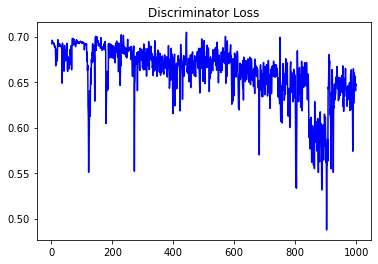

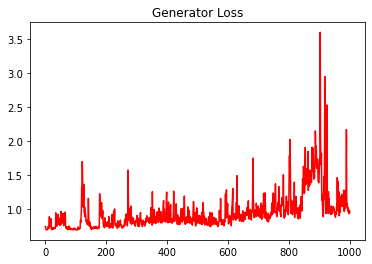

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.045841646517639036


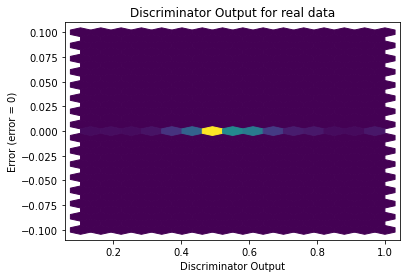

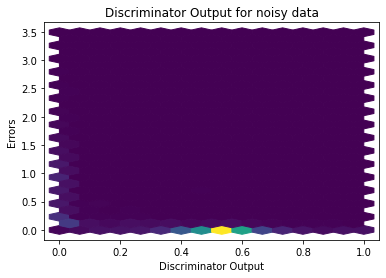

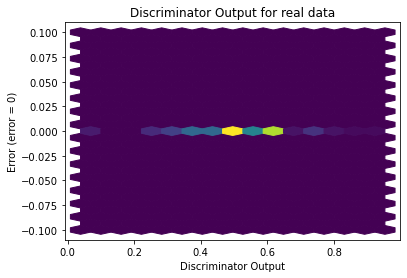

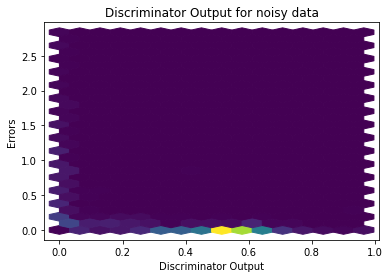

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())